# Visualisation simples

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Charger le fichier CSV
df = pd.read_csv('nhl_play_by_play_combined.csv')

In [29]:
df.columns

Index(['gameId', 'season', 'teamHomeId', 'teamHome', 'teamAwayId', 'teamAway',
       'event_id', 'eventType', 'eventTeamId', 'eventTeam',
       'homeTeamDefendingSide', 'period', 'periodTime', 'coordinateX',
       'coordinateY', 'shooterName', 'goalieName', 'shotType', 'emptyNet',
       'strength'],
      dtype='object')

In [49]:
# Aggregate data by shot type
df_agg = df.groupby(['season','shotType']).agg(total_events=('eventType','count'),total_goals=('is_goal', 'sum'))
df_agg

total_events  total_goals
season   shotType                               
20192020 backhand              5956          715
         deflected             1451          222
         slap                 10732          733
         snap                  9877         1058
         tip-in                3956          659
         wrap-around            671           47
         wrist                41213         3680
20202021 backhand              4453          538
         deflected             1168          182
         slap                  7983          561
         snap                  7798          812
         tip-in                2798          504
         wrap-around            559           38
         wrist                32971         2997
20212022 backhand              7149          890
         deflected             1739          284
         slap                 11481          830
         snap                 11875         1378
         tip-in                4756          804
         wrap-around            776           43
         wrist                51806         4704
20222023 backhand              7014          785
         bat                    211           54
         between-legs            52            8
         cradle                   2            1
         deflected             1394          236
         poke                   422           65
         slap                 10054          755
         snap                 14213         1681
         tip-in                5726          908
         wrap-around            778           61
         wrist                48198         4451
20232024 backhand              6440          756
         bat                    252           64
         between-legs            56            9
         cradle                   6            3
         deflected             1470          204
         poke                   395           48
         slap                  9201          720
         snap                 12512         1645
         tip-in                5955          902
         wrap-around            687           59
         wrist                47940         4344

/var/folders/t2/9c8bj37s0nj1yw_vzddmjy7c0000gn/T/ipykernel_34186/2811387878.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=8)


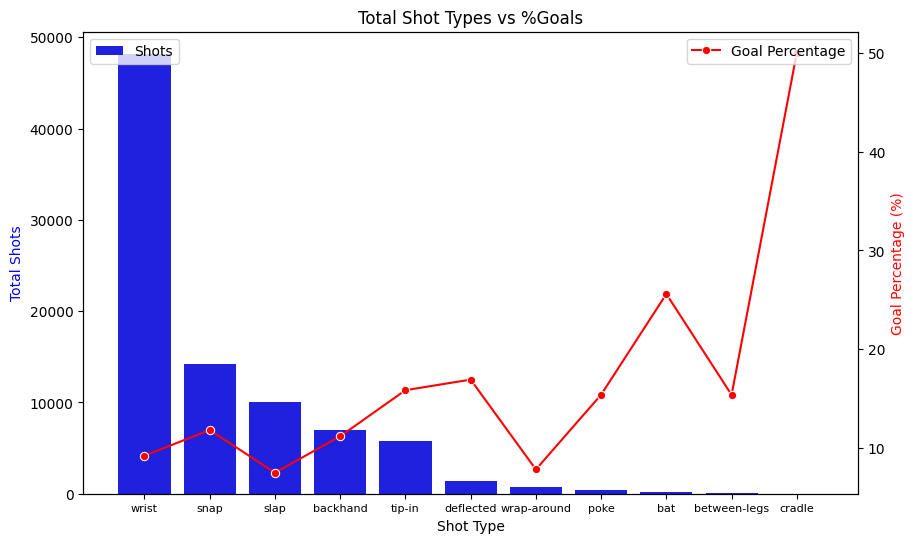

In [87]:
# Create a new column to differentiate between shots and goals
df['is_goal'] = df['eventType'].apply(lambda x: 1 if x == 'goal' else 0)

df_2023 = df[df['season']== 20222023]

# Aggregate data by shot type
df_agg = df_2023.groupby(['season','shotType']).agg(
    total_events=('eventType','count'),
    total_goals=('is_goal', 'sum')).sort_values('total_events', ascending=False)

# Calculate the percentage of goals for each shot type
df_agg['goal_percentage'] = (df_agg['total_goals'] / df_agg['total_events']) * 100

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total shots
sns.barplot(x='shotType', y='total_events', data=df_agg, color='blue', label='Shots', ax=ax1, errorbar=None)

# Create a second y-axis for the percentage of goals
ax2 = ax1.twinx()

# Overlay the goal percentage as a line plot
sns.lineplot(x='shotType', y='goal_percentage', data=df_agg, marker='o', color='red', label='Goal Percentage', ax=ax2)

# Add titles and labels
ax1.set_title('Total Shot Types vs %Goals')
ax1.set_xlabel('Shot Type')
ax1.set_ylabel('Total Shots', color='blue')
ax2.set_ylabel('Goal Percentage (%)', color='red')

# Display the legend for the second y-axis
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=8)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.savefig('../figures/shot_type_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/t2/9c8bj37s0nj1yw_vzddmjy7c0000gn/T/ipykernel_34186/3899181437.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=8)


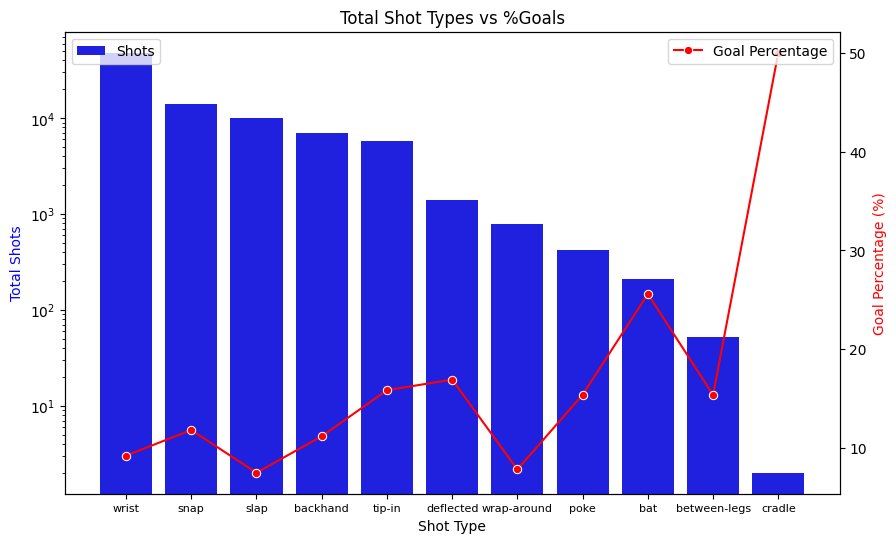

In [93]:
# Create a new column to differentiate between shots and goals
df['is_goal'] = df['eventType'].apply(lambda x: 1 if x == 'goal' else 0)

df_2023 = df[df['season']== 20222023]

# Aggregate data by shot type
df_agg = df_2023.groupby(['season','shotType']).agg(
    total_events=('eventType','count'),
    total_goals=('is_goal', 'sum')).sort_values('total_events', ascending=False)

# Calculate the percentage of goals for each shot type
df_agg['goal_percentage'] = (df_agg['total_goals'] / df_agg['total_events']) * 100

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.yscale('log')

# Bar plot for total shots
sns.barplot(x='shotType', y='total_events', data=df_agg, color='blue', label='Shots', ax=ax1, errorbar=None)

# Create a second y-axis for the percentage of goals
ax2 = ax1.twinx()

# Overlay the goal percentage as a line plot
sns.lineplot(x='shotType', y='goal_percentage', data=df_agg, marker='o', color='red', label='Goal Percentage', ax=ax2)

# Add titles and labels
ax1.set_title('Total Shot Types vs %Goals')
ax1.set_xlabel('Shot Type')
ax1.set_ylabel('Total Shots', color='blue')
ax2.set_ylabel('Goal Percentage (%)', color='red')

# Display the legend for the second y-axis
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=8)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.savefig('../figures/log_shot_type_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [86]:
#Show chart
df_agg

total_events  total_goals  goal_percentage
season   shotType                                                
20222023 wrist                48198         4451         9.234823
         snap                 14213         1681        11.827200
         slap                 10054          755         7.509449
         backhand              7014          785        11.191902
         tip-in                5726          908        15.857492
         deflected             1394          236        16.929699
         wrap-around            778           61         7.840617
         poke                   422           65        15.402844
         bat                    211           54        25.592417
         between-legs            52            8        15.384615
         cradle                   2            1        50.000000

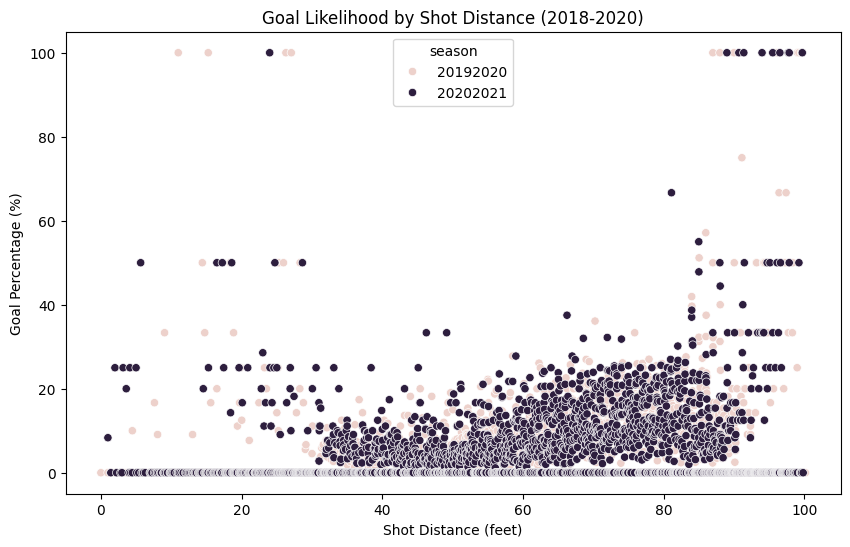

In [90]:
# Assuming df is the DataFrame you're working with

# Step 1: Calculate shot distance using Pythagorean theorem
df['shot_distance'] = np.sqrt(df['coordinateX']**2 + df['coordinateY']**2)

# Step 2: Filter the data for the seasons between 2018-19 and 2020-21
df_filtered = df[df['season'].isin([20182019, 20192020, 20202021])]

# Step 3: Group the data by season and shot distance, calculate total shots and total goals
df_grouped = df_filtered.groupby(['season', 'shot_distance']).agg(
    total_shots=('eventType', 'count'),
    total_goals=('is_goal', 'sum')).reset_index()

# Step 4: Calculate the goal percentage
df_grouped['goal_percentage'] = (df_grouped['total_goals'] / df_grouped['total_shots']) * 100

# Step 5: Plot the goal percentage vs shot distance for each season
plt.figure(figsize=(10, 6))

# Create a line plot to visualize the relationship
sns.scatterplot(data=df_grouped, x='shot_distance', y='goal_percentage', hue='season', marker='o')

# Add titles and labels
plt.title('Goal Likelihood by Shot Distance (2018-2020)')
plt.xlabel('Shot Distance (feet)')
plt.ylabel('Goal Percentage (%)')

# Display the plot
plt.show()
